In [8]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load the data files from Github
deaths_data_path = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/deaths_malaysia.csv'

deaths_data = pd.read_csv(deaths_data_path)

In [10]:
# Display the first few rows of death dataset to understand their structure
deaths_data.head()

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,2,0,2,0,2,0,0,0,0
1,2020-03-18,0,0,0,0,0,0,0,0,0
2,2020-03-19,0,0,0,0,0,0,0,0,0
3,2020-03-20,1,0,1,0,1,0,0,0,0
4,2020-03-21,4,0,4,0,4,0,0,0,0


In [11]:
# to view the dataframe: number of rows, number of columns, column names, non null counts and data types
deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1720 non-null   object
 1   deaths_new      1720 non-null   int64 
 2   deaths_bid      1720 non-null   int64 
 3   deaths_new_dod  1720 non-null   int64 
 4   deaths_bid_dod  1720 non-null   int64 
 5   deaths_unvax    1720 non-null   int64 
 6   deaths_pvax     1720 non-null   int64 
 7   deaths_fvax     1720 non-null   int64 
 8   deaths_boost    1720 non-null   int64 
 9   deaths_tat      1720 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 134.5+ KB


In [12]:
deaths_data.duplicated().sum()  # Check for duplicates

np.int64(0)

In [13]:
# Convert the 'date' column to datetime format and filter the relevant date range
deaths_data['date'] = pd.to_datetime(deaths_data['date'])
filtered_deaths_data = deaths_data[
    (deaths_data['date'] >= '2021-04-01') & (deaths_data['date'] <= '2024-11-30')
]

#check for missing values
null_counts = filtered_deaths_data.isna().sum()
print("Number of missing values in each column:\n", null_counts)

# Aggregate total deaths for each vaccination group. Create a data frame with two columns:
# index: The vaccination statuses (deaths_unvax, deaths_pvax, deaths_fvax, deaths_boost).
# Total Deaths: The total number of deaths for each vaccination status.

total_deaths_by_vax_status = filtered_deaths_data[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum().reset_index()

total_deaths_by_vax_status.columns = ['Vaccination Status', 'Total Deaths']

# Proceed with visualization
total_deaths_by_vax_status


Number of missing values in each column:
 date              0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64


,Vaccination Status,Total Deaths
0,deaths_unvax,21183
1,deaths_pvax,6314
2,deaths_fvax,7000
3,deaths_boost,1497


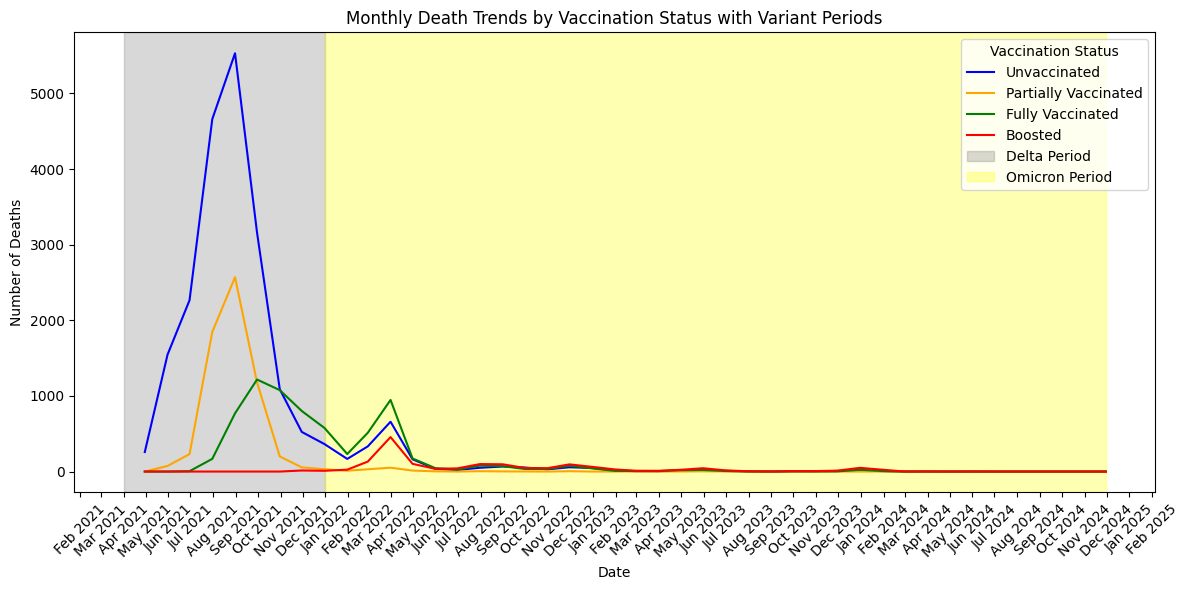

In [21]:
import matplotlib.dates as mdates

delta_period = ('2021-04-01', '2021-12-31')
omicron_period = ('2022-01-01', '2024-11-30')

# Convert to datetime for plotting
delta_start, delta_end = pd.to_datetime(delta_period)
omicron_start, omicron_end = pd.to_datetime(omicron_period)

# Aggregate deaths by month and vaccination status
deaths_by_month = filtered_deaths_data.resample('ME', on='date')[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum()

# Plot trends with shaded periods
plt.figure(figsize=(12, 6))
plt.plot(deaths_by_month.index, deaths_by_month['deaths_unvax'], label='Unvaccinated', color='blue')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_pvax'], label='Partially Vaccinated', color='orange')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_fvax'], label='Fully Vaccinated', color='green')
plt.plot(deaths_by_month.index, deaths_by_month['deaths_boost'], label='Boosted', color='red')

# Add shaded regions for Delta and Omicron periods
plt.axvspan(delta_start, delta_end, color='gray', alpha=0.3, label='Delta Period')
plt.axvspan(omicron_start, omicron_end, color='yellow', alpha=0.3, label='Omicron Period')

# Set x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Final plot adjustments
plt.title('Monthly Death Trends by Vaccination Status with Variant Periods')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='Vaccination Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


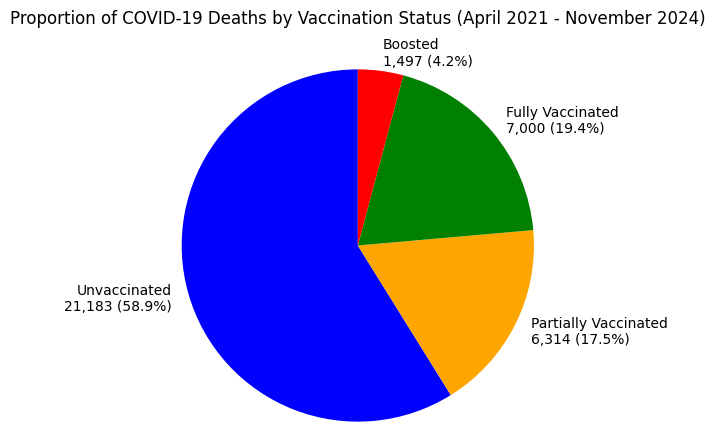

In [23]:
# Aggregate total deaths by vaccination status
total_deaths = filtered_deaths_data[
    ['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']
].sum()

# Calculate percentages for the pie chart
total_deaths_percent = (total_deaths / total_deaths.sum()) * 100

# Prepare data for the pie chart
labels = ['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated', 'Boosted']
sizes = total_deaths.values
percentages = total_deaths_percent.values

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=[f"{label}\n{int(size):,} ({percent:.1f}%)" for label, size, percent in zip(labels, sizes, percentages)],
    startangle=90,
    colors=['blue', 'orange', 'green', 'red']
)
plt.title('Proportion of COVID-19 Deaths by Vaccination Status (April 2021 - November 2024)\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.savefig('VaccinationPieChart.png', bbox_inches='tight')
plt.show()

